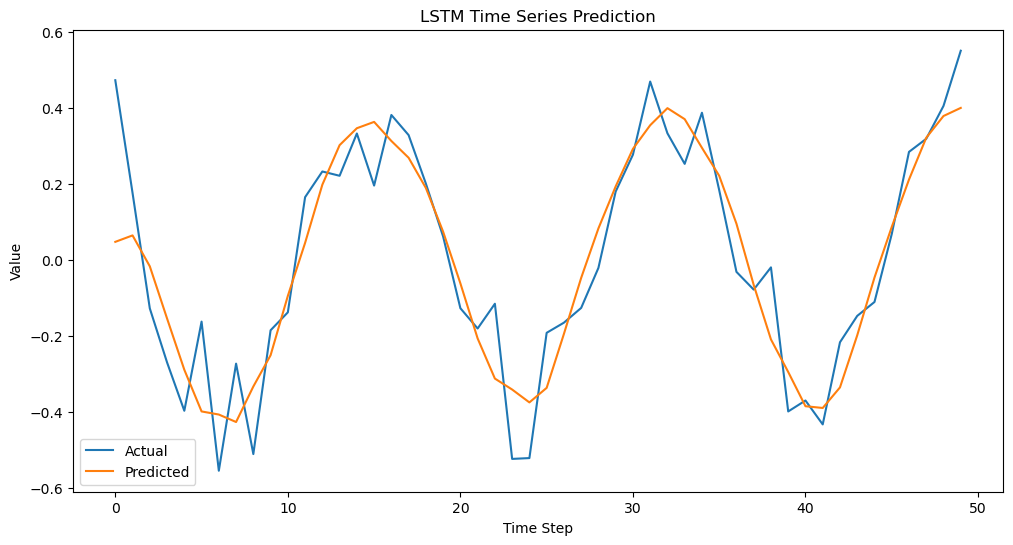

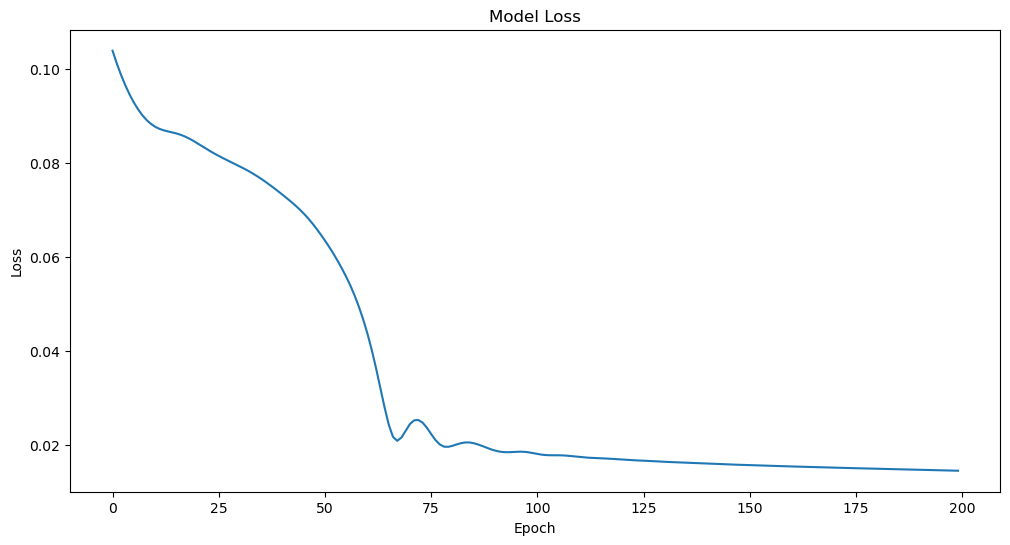

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate random time series data
def generate_time_series(n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * np.random.randn(n_steps)
    return series[..., np.newaxis].astype(np.float32)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.linear(lstm_out)
        return output

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate training data
n_steps = 50
series = generate_time_series(n_steps + 1)
X_train = torch.from_numpy(series[:n_steps]).unsqueeze(0)  # Add batch dimension
y_train = torch.from_numpy(series[1:]).unsqueeze(0)  # Add batch dimension

# Create the LSTM model
input_size = 1
hidden_size = 50
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
n_epochs = 200
losses = []

for epoch in range(n_epochs):
    model.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Generate predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_train)

# Convert tensors to numpy for plotting
y_train_np = y_train.squeeze().numpy()
y_pred_np = y_pred.squeeze().numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train_np, label='Actual')
plt.plot(y_pred_np, label='Predicted')
plt.legend()
plt.title('LSTM Time Series Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(losses)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()